In [1]:
import simulation2 as sim
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
from matplotlib import cm
from tqdm import tqdm
import scipy.stats as stats
import statsmodels.api as sm

In [12]:
v0 = 50 # Active force
k = 10.  # Stiffness of interaction
boundary = 20
n = 10
# Assume 0 for now
epsilon = 0.  # Attractive component of interaction
tau = 40
params = v0, tau, k, epsilon
output, interactions = sim.compute_main(n, params, boundary)

v0:50, tau:40, k:10.0, epsilon:0.0


100%|██████████| 100/100 [00:00<00:00, 2063.70it/s]


In [13]:
def simplePlot(x:np.array, y:np.array, cmap:str='jet', xlab:str = 'X', ylab:str = 'Y', colorBarLabel:str = '', ax:mpl.axes.Axes = None, fig = None, display:bool = True, saveName:str = None, gridBool:bool = False, color:str = 'b', alpha:float = 0.5):
    """
    Plot a scalar field with colors on a 2D grid.

    If ax is already given as argument, will display on that plot. 
    Otherwise, this function creates a new plot.

    Args:
    -----
    - `x` (array-like): X positions.
    - `y` (array-like): Y positions.
    - `vals` (array-like): Scalar values.
    - `cmap` (str, optional): Name of the colormap (default is 'jet').
    - `colorBarLabel` (str, optional): Label of the colorbar (default is '')
    - `xlab` (str, optional): Label of the x axis (default is 'X').
    - `ylab` (str, optional): Label of the y axis (default is 'Y').
    - `ax` (matplotlib.axes._axes.Axes, optional): The axis to plot on.
    - `fig`(..., optional): The figure of the plot
    - `display` (bool, optional): True if want it to be displayed
    - `saveName` (str, optional): Name of the file where it is saved.
        If None, it is not saved
    - `gridBool` (bool, optional): True if want the grid to be displayed

    Returns:
    --------
    ax and fig form matplotlib

    If ax is already given as input, fig is None

    """

    ## generate ax and fig of the figure
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    ax.scatter(x, y, color = color, alpha=alpha)
    ax.plot(x, y, color = color, alpha = alpha)


    ax.set_xlabel(f'{xlab}')
    ax.set_ylabel(f'{ylab}')
    if gridBool:
        ax.grid(True)

    if saveName:
        plt.savefig(f'{saveName}')

    if display:
        plt.show()

    return ax, fig

(<Axes: xlabel='X', ylabel='Y'>, <Figure size 1000x1000 with 1 Axes>)

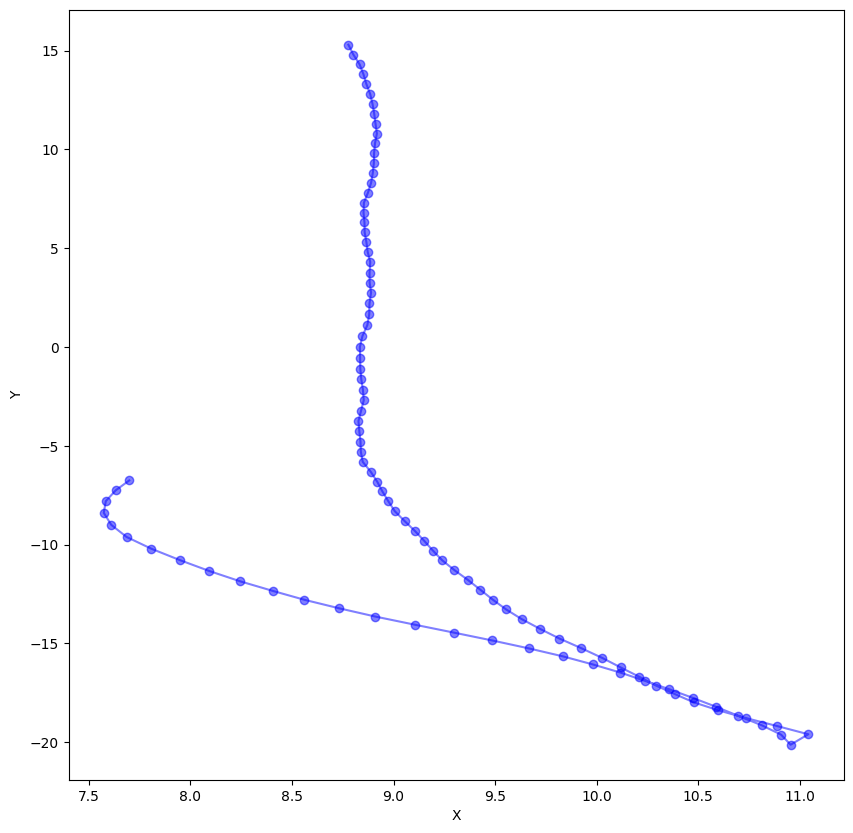

In [14]:
i = 2
simplePlot(output[:, i, 0], output[:, i, 1], display=False, color='b')